In [ ]:
import pandas as pd
from google.colab import files
import math

# Function to determine the age bracket
def get_age_bracket(age):
    if age < 18:
        return 'Child'
    elif age >= 18 and age < 40:
        return 'Adult'
    else:
        return 'Senior'

# Function to determine the gender bracket
def get_gender_bracket(gender):
    if gender == 'M':
        return 'Male'
    elif gender == 'F':
        return 'Female'
    else:
        return 'Other'

# Function to determine the physical condition bracket
def get_physical_condition_bracket(condition):
    if condition in ['Swollen Legs', 'ACL', 'Recovered Hip Girdle', 'Knee Replacement', 'Fractured Arm',
                     'Sprained Ankle', 'Back Pain', 'Shoulder Injury', 'Sprained Wrist', 'Groin Strain']:
        return 'Injury'
    else:
        return 'None'

# Function to determine the activity bracket
def get_activity_bracket(activity):
    if activity in ['Walk', 'Sport']:
        return 'Physical'
    else:
        return 'Other'

# Function to determine the BMI bracket
def get_bmi_bracket(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi >= 18.5 and bmi < 25:
        return 'Normal'
    elif bmi >= 25 and bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Function to calculate stride length
def calculate_stride_length(step_length):
    return 2 * step_length

# Function to calculate cadence
def calculate_cadence(step_duration):
    return 60 / step_duration

# Function to calculate acceleration magnitude
def calculate_acceleration(accel_x, accel_y, accel_z):
    return math.sqrt(accel_x**2 + accel_y**2 + accel_z**2)

# Function to anonymize the dataset based on the bracketing logic
def anonymize_dataset(dataset):
    anonymized_dataset = []

    for _, row in dataset.iterrows():
        age = int(row['Age'])
        gender = row['Gender']
        physical_condition = row['Physical Condition']
        activity = row['Activity']
        bmi = float(row['BMI'])
        gait_speed = float(row['Gait Speed'])
        step_length = float(row['Step Length'])
        step_width = float(row['Step Width'])
        pedometer = int(row['Pedometer'])
        accelerometer_x = float(row['Accelerometer_X'])
        accelerometer_y = float(row['Accelerometer_Y'])
        accelerometer_z = float(row['Accelerometer_Z'])
        gyroscope_x = float(row['Gyroscope_X'])
        gyroscope_y = float(row['Gyroscope_Y'])
        gyroscope_z = float(row['Gyroscope_Z'])
        location_latitude = float(row['Location_Latitude'])
        location_longitude = float(row['Location_Longitude'])
        gravity_x = float(row['Gravity_X'])
        gravity_y = float(row['Gravity_Y'])
        gravity_z = float(row['Gravity_Z'])
        falls = row['Falls']

        age_bracket = get_age_bracket(age)
        gender_bracket = get_gender_bracket(gender)
        physical_condition_bracket = get_physical_condition_bracket(physical_condition)
        activity_bracket = get_activity_bracket(activity)
        bmi_bracket = get_bmi_bracket(bmi)

        # Calculate stride length
        stride_length = calculate_stride_length(step_length)

        # Calculate cadence (steps per minute)
        step_duration = 1 / gait_speed
        cadence = calculate_cadence(step_duration)

        # Calculate acceleration magnitude
        acceleration = calculate_acceleration(accelerometer_x, accelerometer_y, accelerometer_z)

        anonymized_instance = {
            'Age Bracket': age_bracket,
            'Gender Bracket': gender_bracket,
            'Physical Condition Bracket': physical_condition_bracket,
            'Activity Bracket': activity_bracket,
            'BMI Bracket': bmi_bracket,
            'Gait Speed': gait_speed,
            'Step Length': step_length,
            'Stride Length': stride_length,
            'Cadence': cadence,
            'Acceleration': acceleration,
            'Step Width': step_width,
            'Pedometer': pedometer,
            'Accelerometer_X': accelerometer_x,
            'Accelerometer_Y': accelerometer_y,
            'Accelerometer_Z': accelerometer_z,
            'Gyroscope_X': gyroscope_x,
            'Gyroscope_Y': gyroscope_y,
            'Gyroscope_Z': gyroscope_z,
            'Location_Latitude': location_latitude,
            'Location_Longitude': location_longitude,
            'Gravity_X': gravity_x,
            'Gravity_Y': gravity_y,
            'Gravity_Z': gravity_z,
            'Falls': falls
        }

        anonymized_dataset.append(anonymized_instance)

    return anonymized_dataset

# Function to convert XLSX file to CSV
def convert_xlsx_to_csv(file_path):
    data_xlsx = pd.read_excel(file_path)
    data_xlsx.to_csv('dataset.csv', index=False)

# Upload the dataset file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Convert XLSX to CSV
convert_xlsx_to_csv(file_name)

# Read the dataset from the CSV file
dataset = pd.read_csv('dataset.csv')

if dataset.empty:
    print("Dataset is empty!")
else:
    anonymized_dataset = anonymize_dataset(dataset)

    # Convert the anonymized dataset to DataFrame
    output_df = pd.DataFrame(anonymized_dataset)

    # Save the output DataFrame as a CSV file
    output_df.to_csv('anonymized_dataset.csv', index=False)

    # Download the CSV file
    files.download('anonymized_dataset.csv')


Saving Dataset_Final.xlsx to Dataset_Final.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

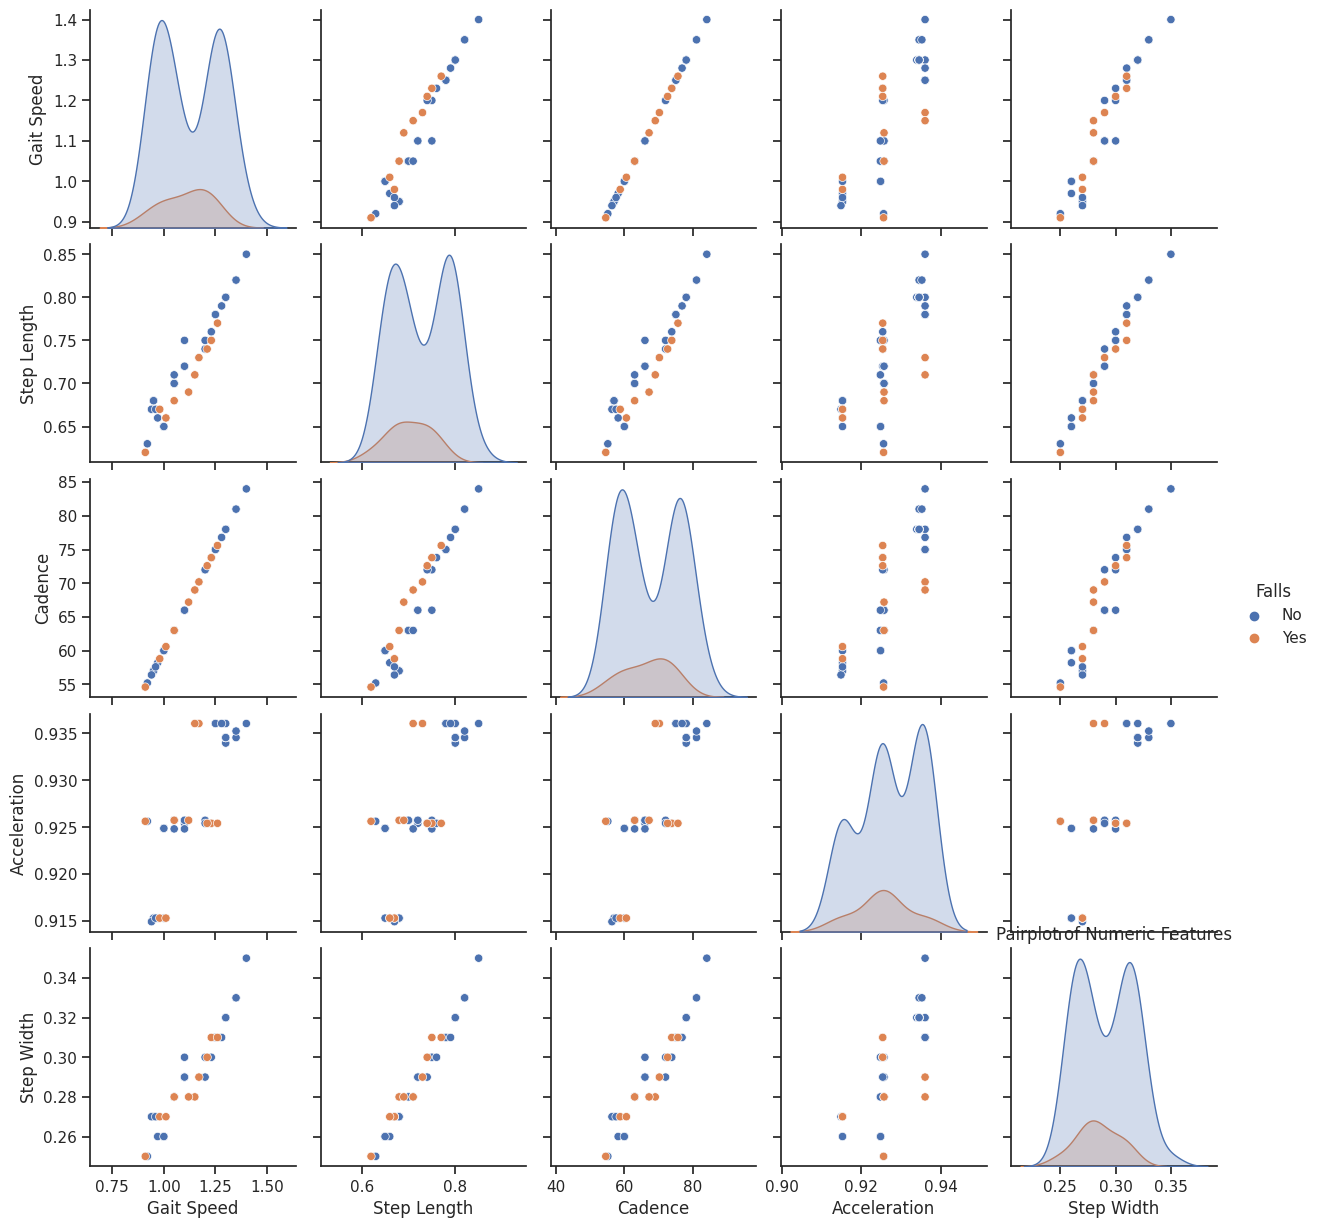

<ipython-input-3-e7bec656cd9b>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = anonymized_dataset.corr()


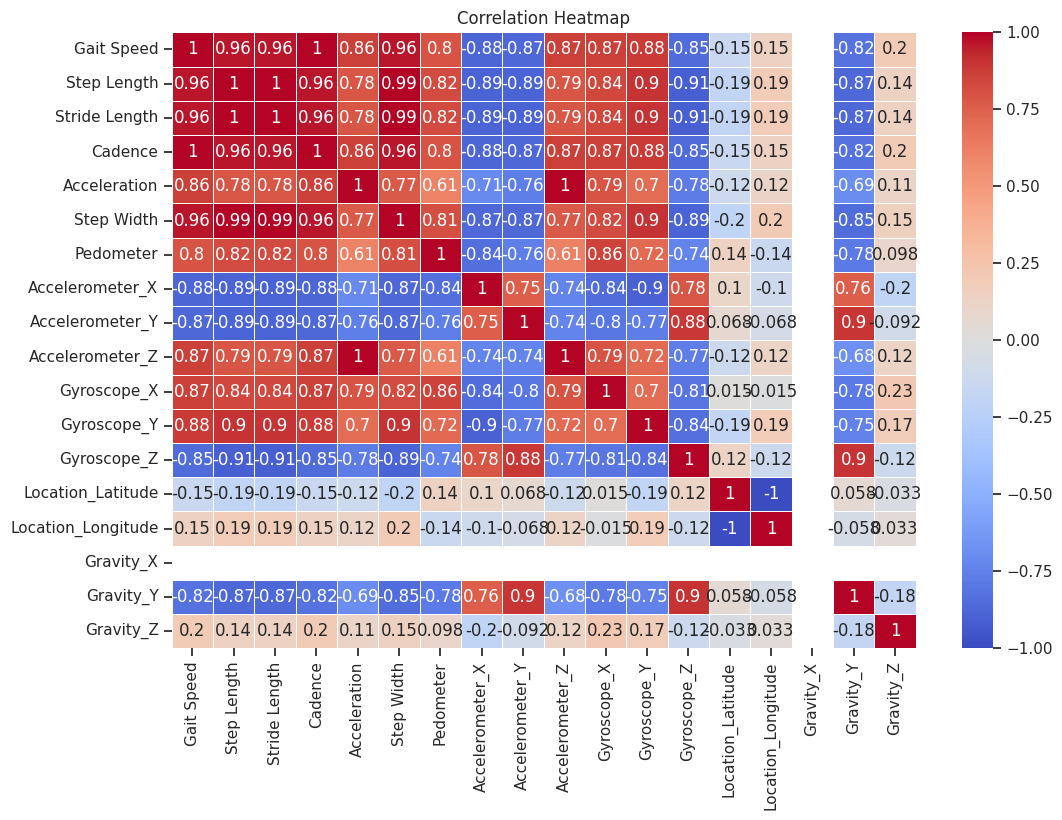

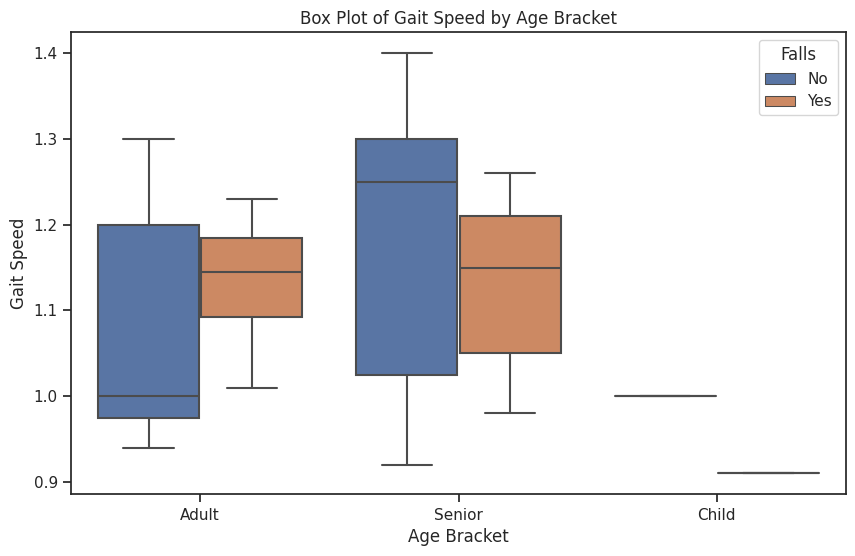

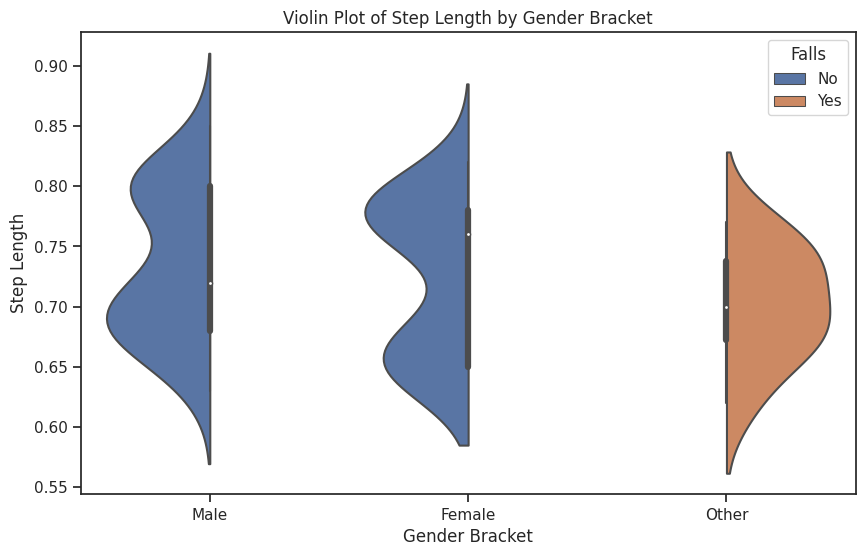

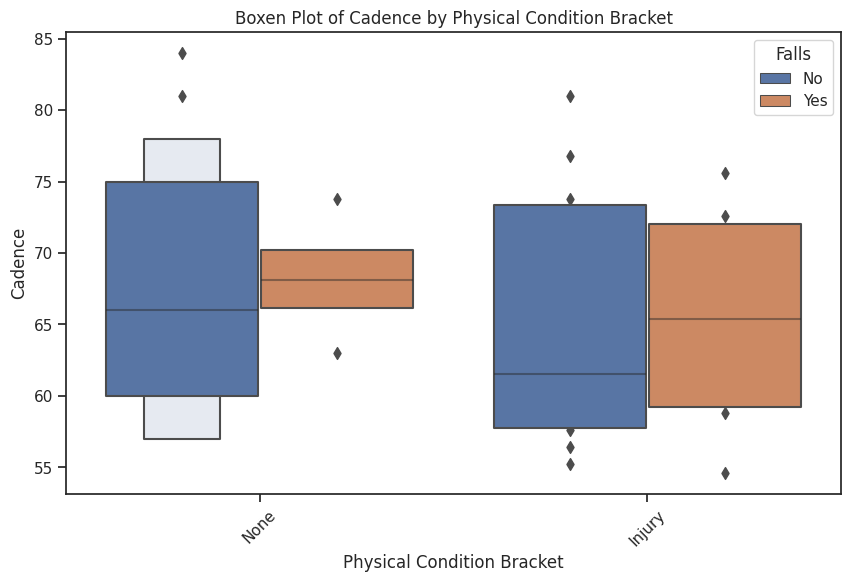

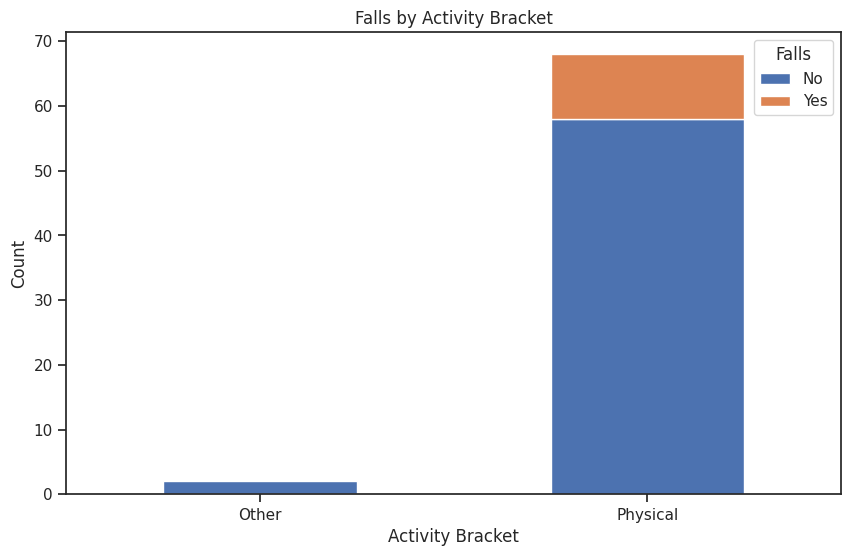

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the anonymized dataset
anonymized_dataset = pd.read_csv('anonymized_dataset.csv')

# Subset of columns for pairplot (add or remove columns as needed)
subset_columns = ['Gait Speed', 'Step Length', 'Cadence', 'Acceleration', 'Step Width']

# Pairplot for the subset of numeric columns
sns.set(style="ticks")
sns.pairplot(anonymized_dataset[subset_columns + ['Falls']], hue="Falls")
plt.title('Pairplot of Numeric Features')
plt.show()


# Correlation heatmap
correlation_matrix = anonymized_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Box plot for Gait Speed by Age Bracket
plt.figure(figsize=(10, 6))
sns.boxplot(data=anonymized_dataset, x='Age Bracket', y='Gait Speed', hue='Falls')
plt.title('Box Plot of Gait Speed by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Gait Speed')
plt.show()

# Violin plot for Step Length by Gender Bracket
plt.figure(figsize=(10, 6))
sns.violinplot(data=anonymized_dataset, x='Gender Bracket', y='Step Length', hue='Falls', split=True)
plt.title('Violin Plot of Step Length by Gender Bracket')
plt.xlabel('Gender Bracket')
plt.ylabel('Step Length')
plt.show()

# Scatter plot of Accelerometer data
fig = px.scatter_3d(anonymized_dataset, x='Accelerometer_X', y='Accelerometer_Y', z='Accelerometer_Z',
                    color='Falls', opacity=0.7, title='3D Scatter Plot of Accelerometer Data')
fig.show()

# Distribution of Cadence by Physical Condition Bracket
plt.figure(figsize=(10, 6))
sns.boxenplot(data=anonymized_dataset, x='Physical Condition Bracket', y='Cadence', hue='Falls')
plt.title('Boxen Plot of Cadence by Physical Condition Bracket')
plt.xlabel('Physical Condition Bracket')
plt.ylabel('Cadence')
plt.xticks(rotation=45)
plt.show()

# Bar chart of Falls by Activity Bracket
activity_falls = anonymized_dataset.groupby(['Activity Bracket', 'Falls']).size().unstack()
activity_falls.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Falls by Activity Bracket')
plt.xlabel('Activity Bracket')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Falls', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from google.colab import files  # Required for downloading files in Google Colab

# Load the original dataset
original_dataset = pd.read_csv('anonymized_dataset.csv')

# Define the features and target variable
X = original_dataset.drop('Falls', axis=1)  # Features
y = original_dataset['Falls']  # Target variable

# Define preprocessing for numeric features
numeric_features = ['Gait Speed', 'Step Length', 'Stride Length', 'Cadence', 'Acceleration', 'Step Width', 'Pedometer',
                    'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Gyroscope_X', 'Gyroscope_Y',
                    'Gyroscope_Z', 'Location_Latitude', 'Location_Longitude', 'Gravity_X', 'Gravity_Y', 'Gravity_Z']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_features = ['Age Bracket', 'Gender Bracket', 'Physical Condition Bracket', 'Activity Bracket', 'BMI Bracket']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Function to generate new data points using a trained model
def generate_new_data(model, num_samples=130):
    # Generate random values for each feature (you can replace this with your custom generation logic)
    new_data = pd.DataFrame(columns=X.columns)
    for feature in X.columns:
        if feature in numeric_features:
            new_data[feature] = np.random.randn(num_samples)
        elif feature in categorical_features:
            categories = X[feature].unique()
            new_data[feature] = np.random.choice(categories, num_samples)

    # Predict falls for the new data
    new_data['Falls'] = model.predict(new_data)

    return new_data

# Generate new data points using the trained model
new_data = generate_new_data(model, num_samples=130)

# Save the new data to a CSV file
new_data.to_csv('new_data.csv', index=False)

# Merge the new dataset with the original dataset
combined_dataset = pd.concat([original_dataset, new_data], ignore_index=True)

# Save the combined dataset to a CSV file
combined_dataset.to_csv('combined_dataset.csv', index=False)

# Download the combined dataset
files.download('combined_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

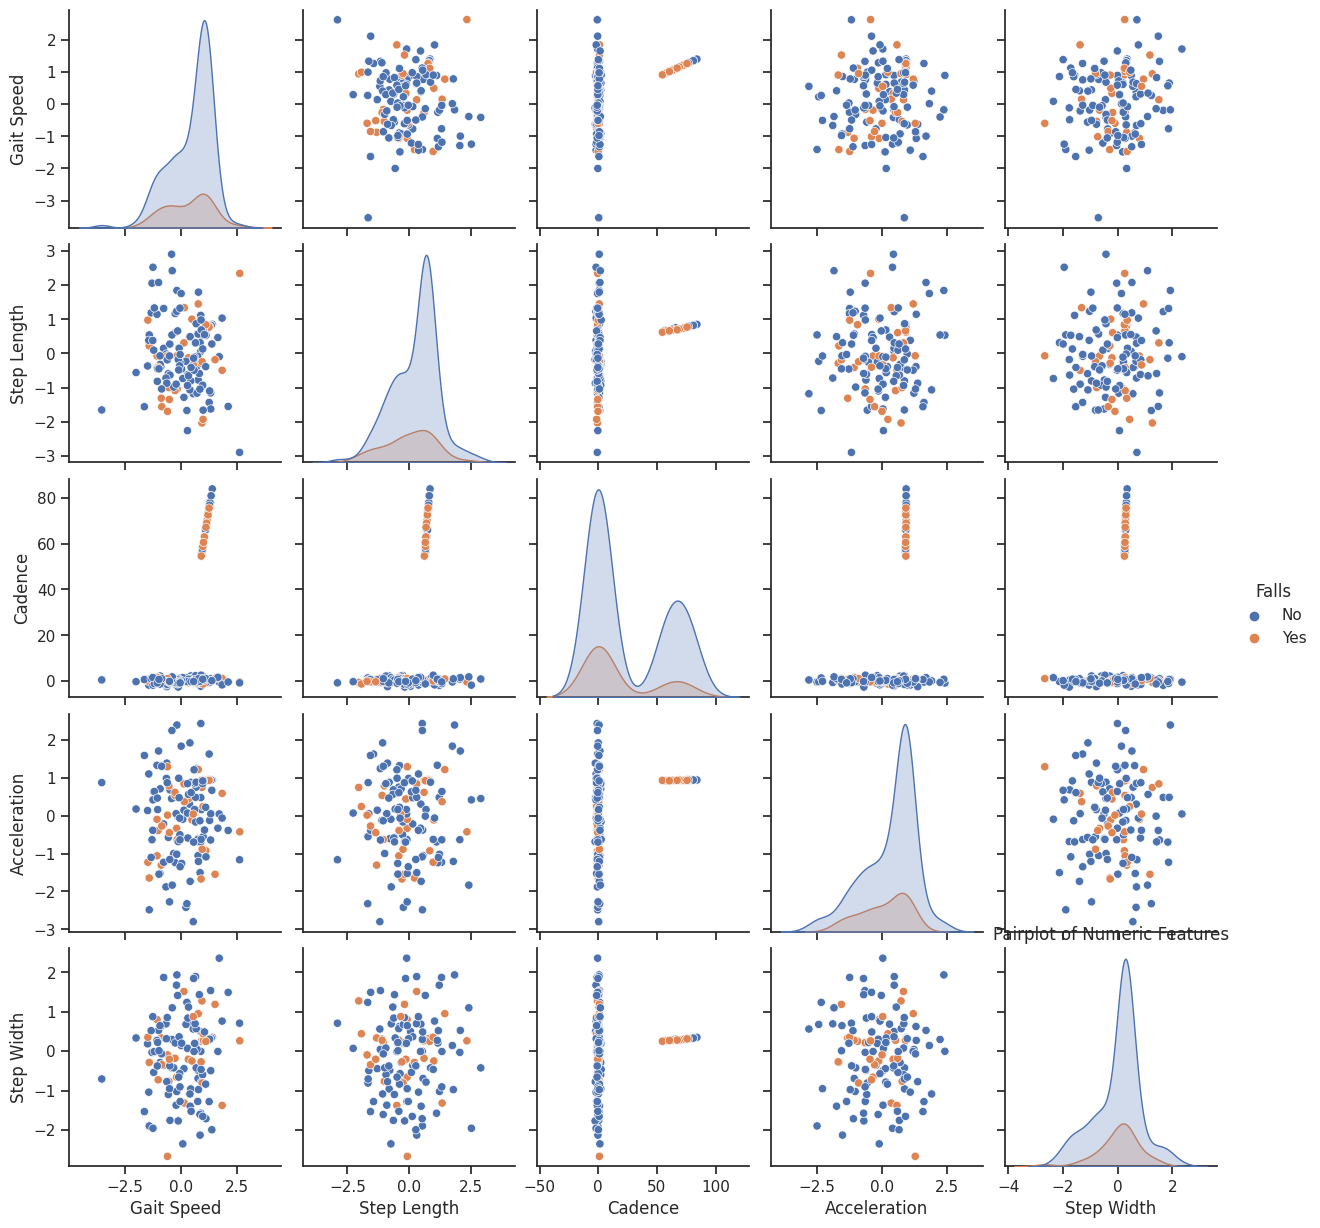

<ipython-input-10-82925edee8cc>:20: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



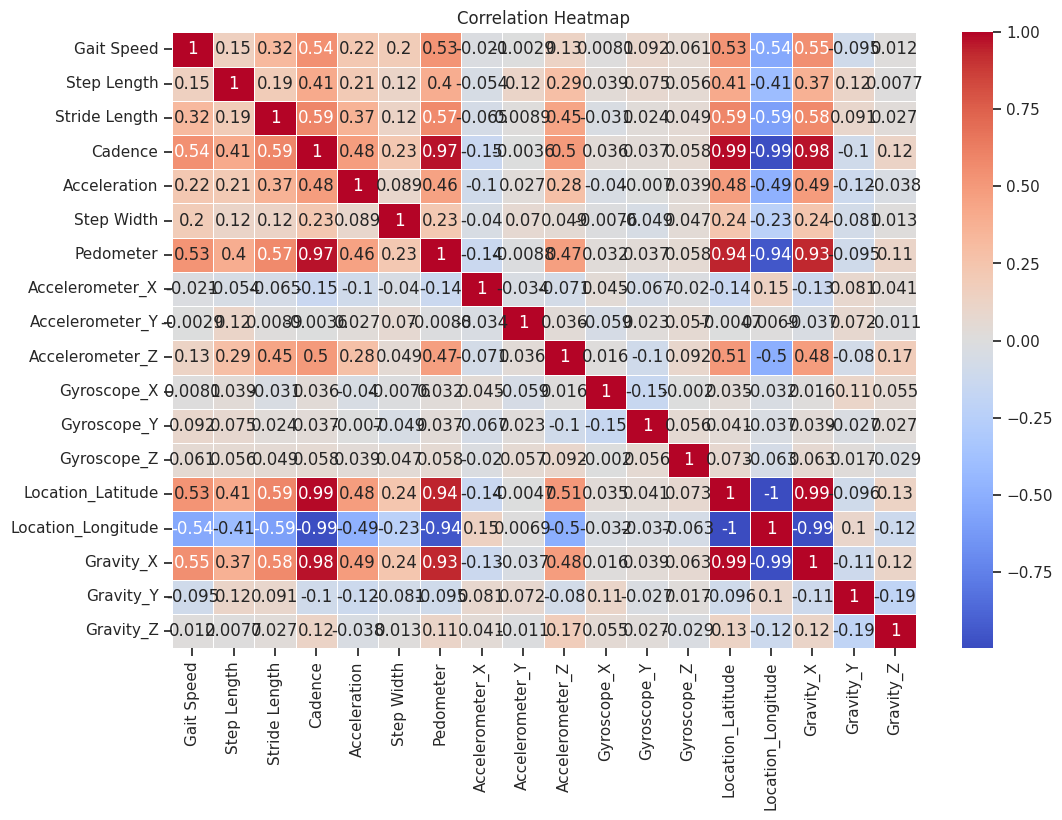

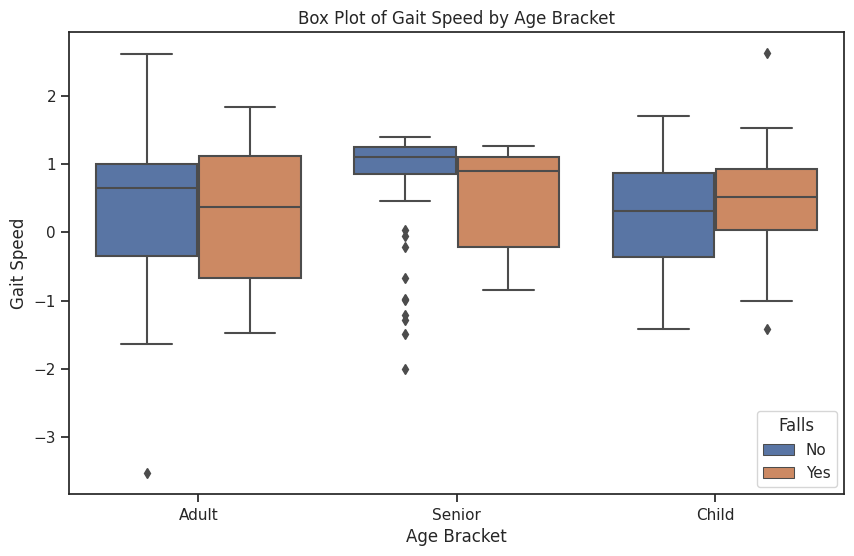

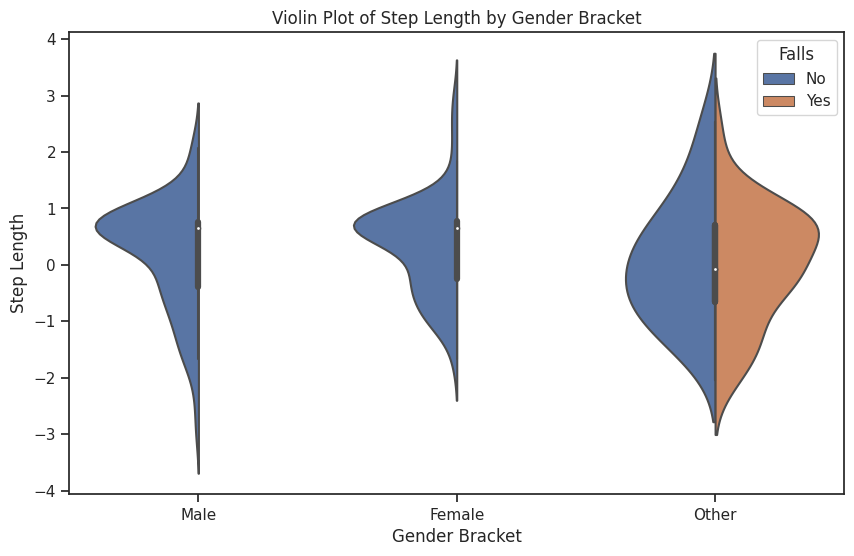

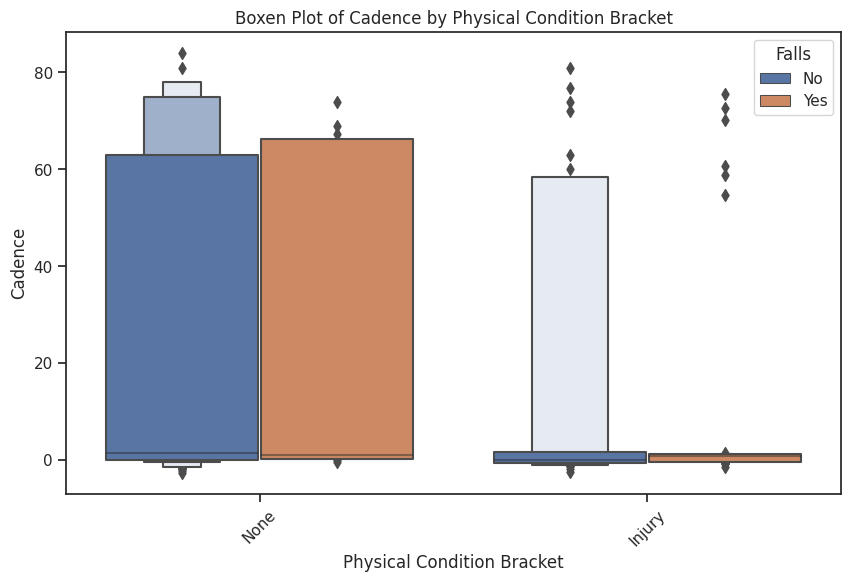

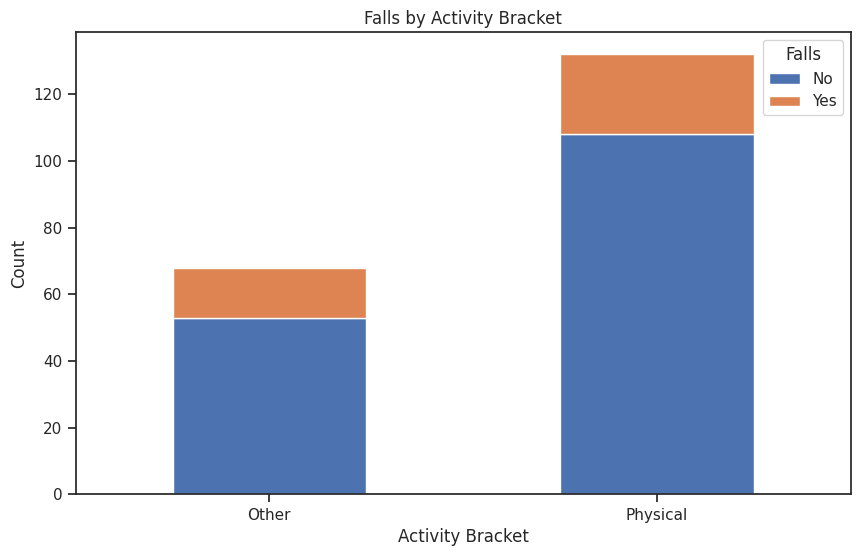

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the anonymized dataset
anonymized_dataset = pd.read_csv('combined_dataset.csv')

# Subset of columns for pairplot (add or remove columns as needed)
subset_columns = ['Gait Speed', 'Step Length', 'Cadence', 'Acceleration', 'Step Width']

# Pairplot for the subset of numeric columns
sns.set(style="ticks")
sns.pairplot(anonymized_dataset[subset_columns + ['Falls']], hue="Falls")
plt.title('Pairplot of Numeric Features')
plt.show()


# Correlation heatmap
correlation_matrix = anonymized_dataset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Box plot for Gait Speed by Age Bracket
plt.figure(figsize=(10, 6))
sns.boxplot(data=anonymized_dataset, x='Age Bracket', y='Gait Speed', hue='Falls')
plt.title('Box Plot of Gait Speed by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Gait Speed')
plt.show()

# Violin plot for Step Length by Gender Bracket
plt.figure(figsize=(10, 6))
sns.violinplot(data=anonymized_dataset, x='Gender Bracket', y='Step Length', hue='Falls', split=True)
plt.title('Violin Plot of Step Length by Gender Bracket')
plt.xlabel('Gender Bracket')
plt.ylabel('Step Length')
plt.show()

# Scatter plot of Accelerometer data
fig = px.scatter_3d(anonymized_dataset, x='Accelerometer_X', y='Accelerometer_Y', z='Accelerometer_Z',
                    color='Falls', opacity=0.7, title='3D Scatter Plot of Accelerometer Data')
fig.show()

# Distribution of Cadence by Physical Condition Bracket
plt.figure(figsize=(10, 6))
sns.boxenplot(data=anonymized_dataset, x='Physical Condition Bracket', y='Cadence', hue='Falls')
plt.title('Boxen Plot of Cadence by Physical Condition Bracket')
plt.xlabel('Physical Condition Bracket')
plt.ylabel('Cadence')
plt.xticks(rotation=45)
plt.show()

# Bar chart of Falls by Activity Bracket
activity_falls = anonymized_dataset.groupby(['Activity Bracket', 'Falls']).size().unstack()
activity_falls.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Falls by Activity Bracket')
plt.xlabel('Activity Bracket')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Falls', loc='upper right', labels=['No', 'Yes'])
plt.show()


Accuracy: 90.00%


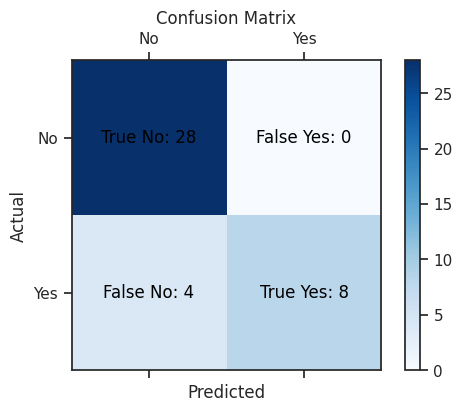

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the combined dataset
combined_dataset = pd.read_csv('combined_dataset.csv')

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Age Bracket', 'Gender Bracket', 'Physical Condition Bracket', 'Activity Bracket', 'BMI Bracket']
for col in categorical_cols:
    le = LabelEncoder()
    combined_dataset[col] = le.fit_transform(combined_dataset[col])
    label_encoders[col] = le

# Split the dataset into features (X) and target (y)
X = combined_dataset.drop(columns=['Falls'])
y = combined_dataset['Falls']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Calculate accuracy
accuracy = accuracy_score(y_test, clf.predict(X_test))

# Display accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Create a confusion matrix
confusion = confusion_matrix(y_test, clf.predict(X_test))

# Create a simplified explanation for a 5-year-old
true_no, false_yes, false_no, true_yes = confusion.ravel()

# Display the confusion matrix
plt.figure(figsize=(6, 4))
plt.matshow(confusion, cmap='Blues', fignum=1)
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No', 'Yes'])
plt.yticks([0, 1], ['No', 'Yes'])
plt.title('Confusion Matrix')
plt.text(0, 0, f'True No: {true_no}', ha='center', va='center', color='black')
plt.text(1, 0, f'False Yes: {false_yes}', ha='center', va='center', color='black')
plt.text(0, 1, f'False No: {false_no}', ha='center', va='center', color='black')
plt.text(1, 1, f'True Yes: {true_yes}', ha='center', va='center', color='black')
plt.show()
